In [1]:
import collections
from vnpy.app.script_trader import init_cli_trading
from vnpy.app.script_trader.cli import process_log_event
from vnpy.gateway.ib import IbGateway
from time import sleep
from datetime import datetime
import pandas as pd
from vnpy.app.cta_strategy.backtesting import BacktestingEngine
from vnpy.app.cta_strategy.strategies.king_keltner_strategy import KingKeltnerStrategy

c:\vnstudio\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\vnstudio\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\vnstudio\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="MGC.NYMEX",
    interval="1m",
    start=datetime(2007, 12, 12),
    end=datetime(2020, 5, 1),
    rate=0.000028,
    slippage=0.1,
    size=10,
    pricetick=0.1,
    capital=20000,
    collection_name = "MGC"
)
engine.load_data()

2020-06-06 23:19:11.071883	开始加载历史数据
2020-06-06 23:19:11.076880	加载进度： [1%]
2020-06-06 23:19:11.078880	加载进度： [1%]
2020-06-06 23:19:11.079879	加载进度： [2%]
2020-06-06 23:19:11.081877	加载进度： [3%]
2020-06-06 23:19:11.083878	加载进度： [3%]
2020-06-06 23:19:11.085876	加载进度： [4%]
2020-06-06 23:19:11.087875	加载进度： [5%]
2020-06-06 23:19:11.088875	加载进度： [5%]
2020-06-06 23:19:11.090874	加载进度： [6%]
2020-06-06 23:19:11.092872	加载进度： [7%]
2020-06-06 23:19:11.094872	加载进度： [7%]
2020-06-06 23:19:11.095873	加载进度： [8%]
2020-06-06 23:19:11.097870	加载进度： [9%]
2020-06-06 23:19:11.098869	加载进度： [9%]
2020-06-06 23:19:11.100869	加载进度： [10%]
2020-06-06 23:19:11.102868	加载进度：# [11%]
2020-06-06 23:19:11.103869	加载进度：# [11%]
2020-06-06 23:19:11.105866	加载进度：# [12%]
2020-06-06 23:19:11.107865	加载进度：# [13%]
2020-06-06 23:19:11.108865	加载进度：# [13%]
2020-06-06 23:19:11.110864	加载进度：# [14%]
2020-06-06 23:19:11.111863	加载进度：# [15%]
2020-06-06 23:19:11.113862	加载进度：# [15%]
2020-06-06 23:19:11.114863	加载进度：# [16%]
2020-06-06 23:19:11.116861	加载进度：#

In [3]:
class_dict = collections.defaultdict(list)
for class_instance in engine.history_data:
    for key, value in class_instance.__dict__.items():
        class_dict[key].append(value)
frame = pd.DataFrame.from_dict(class_dict)

In [4]:
frame.head(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
0,DB,MGC,Exchange.NYMEX,2011-03-25 00:12:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
1,DB,MGC,Exchange.NYMEX,2011-03-25 01:29:00,Interval.MINUTE,2.0,0.0,1434.7,1434.7,1434.7,1434.7,MGC.NYMEX
2,DB,MGC,Exchange.NYMEX,2011-03-25 01:33:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
3,DB,MGC,Exchange.NYMEX,2011-03-25 02:28:00,Interval.MINUTE,1.0,0.0,1436.5,1436.5,1436.5,1436.5,MGC.NYMEX
4,DB,MGC,Exchange.NYMEX,2011-03-25 03:02:00,Interval.MINUTE,1.0,0.0,1436.2,1436.2,1436.2,1436.2,MGC.NYMEX


In [5]:
frame.tail(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
1189589,DB,MGC,Exchange.NYMEX,2020-01-31 12:33:00,Interval.MINUTE,2.0,0.0,1456.6586,1456.6586,1455.7385,1455.7385,MGC.NYMEX
1189590,DB,MGC,Exchange.NYMEX,2020-01-31 12:36:00,Interval.MINUTE,2.0,0.0,1457.7627,1457.7627,1457.7627,1457.7627,MGC.NYMEX
1189591,DB,MGC,Exchange.NYMEX,2020-01-31 15:22:00,Interval.MINUTE,5.0,0.0,1459.8789,1459.8789,1459.8789,1459.8789,MGC.NYMEX
1189592,DB,MGC,Exchange.NYMEX,2020-01-31 15:24:00,Interval.MINUTE,5.0,0.0,1460.2469,1460.2469,1460.2469,1460.2469,MGC.NYMEX
1189593,DB,MGC,Exchange.NYMEX,2020-01-31 15:59:00,Interval.MINUTE,1.0,0.0,1459.0508,1459.0508,1459.0508,1459.0508,MGC.NYMEX


In [6]:
engine.add_strategy(KingKeltnerStrategy, {})

2020-06-06 23:22:42.599186	策略初始化完成
2020-06-06 23:22:42.600185	开始回放历史数据
2020-06-06 23:23:08.990470	历史数据回放结束
2020-06-06 23:23:08.991469	开始计算逐日盯市盈亏
2020-06-06 23:23:09.031451	逐日盯市盈亏计算完成
2020-06-06 23:23:09.032450	开始计算策略统计指标
2020-06-06 23:23:09.046443	------------------------------
2020-06-06 23:23:09.046443	首个交易日：	2011-04-06
2020-06-06 23:23:09.046443	最后交易日：	2020-01-31
2020-06-06 23:23:09.046443	总交易日：	2744
2020-06-06 23:23:09.047442	盈利交易日：	1344
2020-06-06 23:23:09.047442	亏损交易日：	1379
2020-06-06 23:23:09.047442	起始资金：	20,000.00
2020-06-06 23:23:09.047442	结束资金：	19,716.94
2020-06-06 23:23:09.048442	总收益率：	-1.42%
2020-06-06 23:23:09.048442	年化收益：	-0.12%
2020-06-06 23:23:09.048442	最大回撤: 	-5,682.68
2020-06-06 23:23:09.048442	百分比最大回撤: -26.87%
2020-06-06 23:23:09.049441	最长回撤天数: 	2204
2020-06-06 23:23:09.049441	总盈亏：	-283.06
2020-06-06 23:23:09.049441	总手续费：	2,056.01
2020-06-06 23:23:09.049441	总滑点：	5,361.00
2020-06-06 23:23:09.050441	总成交金额：	73,428,815.30
2020-06-06 23:23:09.050441	总成交笔数：	5361
2020-06-06

c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

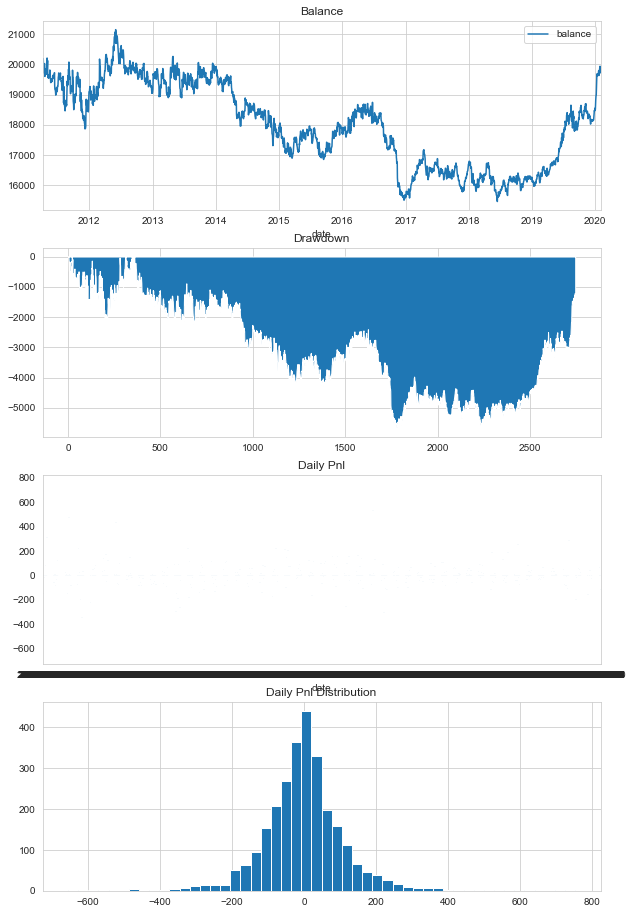

In [7]:
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()